# Data Analysis Project Using Python

<!-- 1)	What type of restaurant do the majority of customers order from?

2   How many votes has each type of restaurant received from customers?

3)	What are the ratings that the majority of restaurants have received?

4)	Zomato has observed that most couples order most of their food online.     What is their average spending on each order?

5)	Which mode (online or offline) has received the maximum rating?

6)	Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers? -->


# step 1: Import necessary python Libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# step 2 : Creat the data Frame.

In [2]:
data = pd.read_csv(r"C:\Users\SSSD\Downloads\Zomato data .csv")
print(data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.3+ KB


In [4]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# let's convert the data type of the "rate" column to float and remove the denominator

In [5]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [6]:
data ['rate'] = data['rate'].apply(handlerate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Summary of the data frame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.8+ KB


# Conclusion - There is no Null value in dataframe

### Type of resturant

Text(0.5, 0, 'type of restaurant')

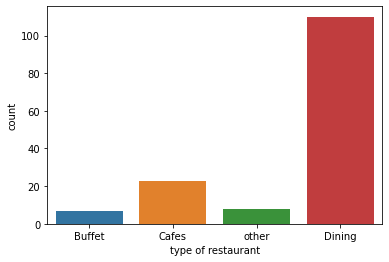

In [9]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('type of restaurant')

In [13]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

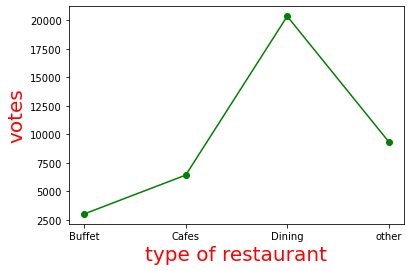

In [23]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})

plt.plot(result, c='green', marker='o')
plt.xlabel("type of restaurant", c='red', size= 20)
plt.ylabel("votes", c='red', size=20)

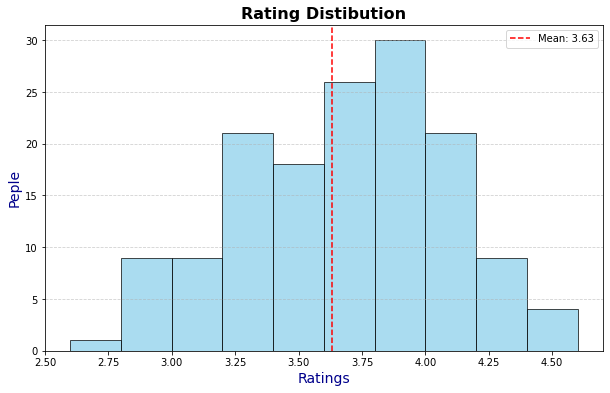

In [36]:
#ploting the histogram
plt.figure(figsize = (10, 6))
plt.hist(data['rate'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

#adding titile and lable with styling
plt.title("Rating Distibution", fontsize=16, fontweight='bold')
plt.xlabel("Ratings", fontsize=14, color='darkblue')
plt.ylabel("Peple", fontsize=14, color='darkblue')

plt.grid(axis='y', linestyle='--', alpha=0.6 )

mean_value = data['rate'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

plt.legend()
plt.show()

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

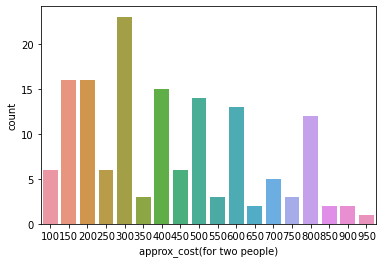

In [38]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

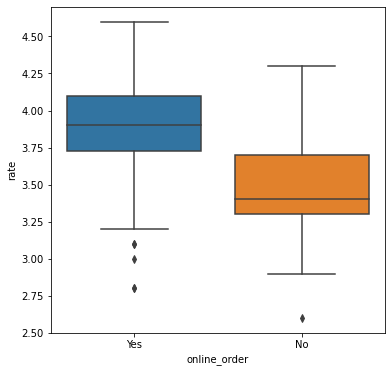

In [39]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y ='rate', data=data)

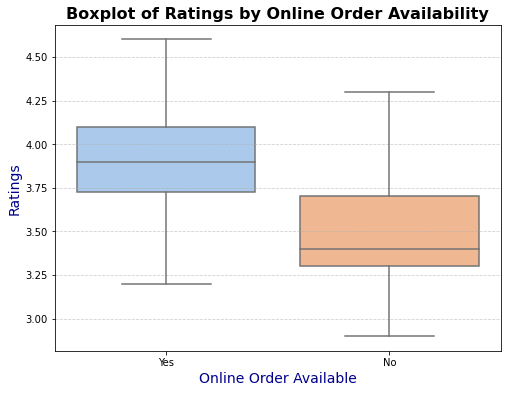

In [45]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='online_order', y='rate', data=data, palette="pastel", showfliers=False)

# Adding meaningful title and labels
plt.title("Boxplot of Ratings by Online Order Availability", fontsize=16, fontweight='bold')
plt.xlabel("Online Order Available", fontsize=14, color='darkblue')
plt.ylabel("Ratings", fontsize=14, color='darkblue')

# Adding a grid for better interpretation
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


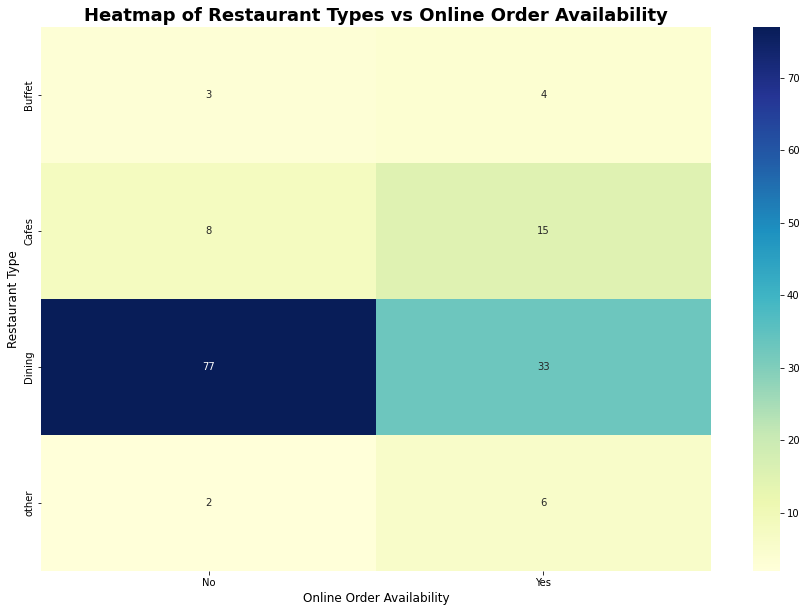

In [55]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

# Add labels and title
plt.title("Heatmap of Restaurant Types vs Online Order Availability", fontsize=18, fontweight='bold')
plt.xlabel("Online Order Availability", fontsize=12)
plt.ylabel("Restaurant Type", fontsize=12)
plt.show()